# Gaussian Naive Bayes

In [1]:
%matplotlib inline
import util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

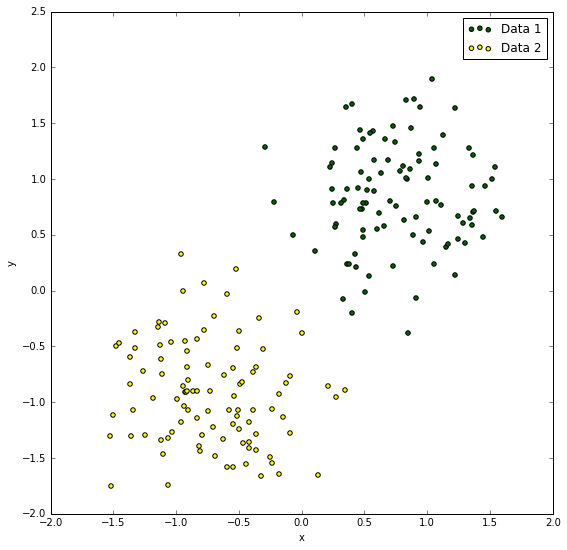

In [10]:
variance = 0.2
data = 100
pos = [0,0]
pos_vec = [0.8, 0.8]
d1, d2, colors = util.create_isotropic_gaussian_twindataset(pos, data, variance, pos_vec)

# plot data with pandas wrapper
pd1 = pd.DataFrame(d1, columns=['x','y'])
pd2 = pd.DataFrame(d2, columns=['x','y'])
ax = pd1.plot(kind='scatter', x='x', y='y', figsize=(9,9), color=colors[0], label='Data 1')
pd2.plot(kind='scatter', x='x', y='y', figsize=(9,9), color=colors[1], label='Data 2', ax=ax)

In [11]:
gaussian = util.GaussianNaiveBayes((d1,d2))

In [12]:
gaussian.learn()

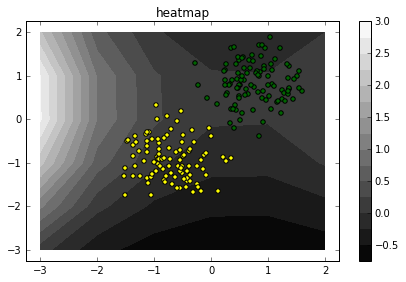

In [13]:
gaussian.plot_discriminant_function(colors)

In [ ]:
train_data = []
test_data = []
test_names = []
train_names = []
total_amount = 0
for root, files in util.get_person_images('../lfw_funneled/', 'jpg', 70):
    name, data, amount = util.get_dataset(root, files, 8)
    test_amount = int(np.ceil(amount*0.4))
    train_amount = int(np.floor(amount*0.6))
    index = np.arange(0, amount, dtype=np.int)
    total_amount = total_amount + amount
    # shuffle index to select random images
    np.random.shuffle(index)
    # save name vector
    test_names.extend([name]*test_amount)
    train_names.extend([name]*train_amount)
    train_data.append(np.asmatrix([data[index] for index in index[test_amount:]]))
    test_data.append(np.asmatrix([data[index] for index in index[:test_amount]]))
    print("{} hat {} Trainings Bilder und {} Test Bilder".format(name, train_amount, test_amount))

In [ ]:
train_design_matrix = np.asmatrix(np.concatenate(train_data))
test_design_matrix = np.asmatrix(np.concatenate(test_data))

In [ ]:
# align test and training data
train_mean = np.mean(train_design_matrix, axis=1)
test_mean = np.mean(test_design_matrix, axis=1)
train_aligned = train_design_matrix - train_mean
test_aligned = test_design_matrix - test_mean

In [ ]:
u, d, v = np.linalg.svd(train_aligned, full_matrices=False)
u.shape, d.shape, v.shape

In [ ]:
# Plot the first 12 eigenfaces
fig = plt.figure()    
fig, ax = plt.subplots(figsize=(14, 14))
for i, eigenface in enumerate(v[:7], start=1):
    plt.subplot(1, 7, i)
    dim = np.sqrt(eigenface.shape[1])
    plt.imshow(np.reshape(eigenface, (dim, dim)), cmap=plt.gray())

In [ ]:
features = 7
train_projected = np.dot(v[:features], train_aligned.T).T
test_projected = np.dot(v[:features], test_aligned.T).T

In [ ]:
print("Shape Projiziert: train {}, test {}".format(np.shape(train_projected), np.shape(test_projected)))

In [ ]:
#person = 'George_W_Bush'
person = 'Ariel_Sharon'

train_mask_george = np.asmatrix(train_names) == person
test_mask_george = np.asmatrix(test_names) == person

In [ ]:
train_george = np.compress(train_mask_george[0,:], train_projected, axis=0)
train_not_george = np.compress((~train_mask_george)[0,:], train_projected, axis=0)
train_labels = np.asarray([-1 if b else 1 for b in train_mask_george[0,:]])

test_george = np.compress(test_mask_george[0,:], test_projected, axis=0)
test_not_george = np.compress(~test_mask_george[0,:], test_projected, axis=0)
test_labels = np.asarray([-1 if b else 1 for b in test_mask_george[0,:]])

In [ ]:
gaussian = util.gaussian((train_george, train_not_george))

In [ ]:
gaussian.learn()

In [ ]:
george_perceptron.classify(test_projected,test_labels)